# MATH 210 Introduction to Mathematical Computing

## March 21, 2016

Today's Agenda:

1. Introduction to pandas:
    * DataFrames and Importing Data with `pandas.read_csv`
    * Getting an Overview of the DataFrame
    * Accessing Rows and Columns
    * Plotting
2. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Introduction to pandas

pandas is Python's data analysis library and it is built on top of NumPy and matplotlib (see the [official pandas webpage](http://pandas.pydata.org/)). Let's begin by importing pandas:

In [2]:
import pandas as pd

### DataFrames and Importing Data with `pandas.read_csv`

The main data structure in the pandas library is the DataFrame. A pandas DataFrame resembles an Excel spreadsheet but with much more power and flexibility. The most common way to define a DataFrame is to import some data. The pd.read_csv function is a very powerful and flexible tool for importing data of all shapes and kinds.

Let's import some data. The following dataset is taken from the [Statsitics Canada](http://www.statcan.gc.ca/) website and it describes the population of Canada and its provinces and territories by year from 1952 to 2015. The first column is the year and so we can specify an option in `read_csv` to set that column to the index of the DataFrame.

In [3]:
pop_data = pd.read_csv("canada_population_data.csv",index_col=0)

In [4]:
type(pop_data)

pandas.core.frame.DataFrame

The function `read_csv` has a lot of functionality. Enter `pd.read_csv?` to see all the options!

In [5]:
pd.read_csv?

### Getting an Overview of the DataFrame

Now that we have a DataFrame, let's see what we have! We use the following functions to get an overview of the data:

* `pd.head(nrows)` - view the first `nrows` of the DataFrame (where `nrows` has default value 5)
* `pd.tail(nrows)` - view the last `nrows` of the DataFrame (where `nrows` has default value 5)
* `pd.info()` - view a summary of the number of columns and rows and their dataypes

Notice that the first column on the left is the **index column** which we set to be the year.

In [6]:
pop_data.head()

,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories including Nunavut,Northwest Territories,Nunavut
Year,,,,,,,,,,,,,,,
1952,14436750,372750,100250,652250,525250,4167750,4779250,796000,842250,971500,1204500,9000,16000,NaN,NaN
1953,14833000,383000,101000,663250,532500,4267000,4935250,808500,859000,1010250,1248250,9000,16000,NaN,NaN
1954,15269500,394500,101000,672000,539750,4385000,5108250,822500,871750,1054250,1294000,9750,16750,NaN,NaN
1955,15681250,405500,100000,682750,547000,4510750,5258250,838750,878250,1089500,1341500,11250,17750,NaN,NaN
1956,16070250,415000,99250,693250,554500,4624750,5403000,848750,879750,1122250,1399000,12000,18750,NaN,NaN


In [7]:
pop_data.tail(10)

,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories including Nunavut,Northwest Territories,Nunavut
Year,,,,,,,,,,,,,,,
2006,32528626,511103,137878,937659,745966,7626106,12641896,1182247,992276,3410912,4236434,32224,NaN,43198,30727
2007,32847675,509680,137814,935387,745319,7685354,12749822,1187953,1000495,3502678,4286244,32454,NaN,43202,31273
2008,33198550,511789,138615,935986,746849,7753366,12865668,1196350,1015886,3582788,4343104,33028,NaN,43335,31788
2009,33581080,516147,139730,938367,749640,7832800,12983106,1206574,1032532,3667912,4405052,33687,NaN,43068,32466
2010,33958588,521561,141519,941983,752660,7918420,13117298,1219107,1049312,3724528,4461376,34408,NaN,43171,33246
2011,34302909,524754,143732,944512,755285,7996821,13249885,1232071,1064673,3781472,4497034,35209,NaN,43407,34054
2012,34698875,526722,145066,944934,756580,8073312,13393063,1248325,1084298,3873407,4538794,36020,NaN,43675,34679
2013,35102353,528271,145340,943524,755810,8143836,13533970,1263560,1103406,3989191,4579968,36331,NaN,43852,35296
2014,35496547,528839,145963,942932,755058,8206005,13664922,1278114,1120272,4104536,4633220,36733,NaN,43968,35984


In [8]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1952 to 2015
Data columns (total 15 columns):
Canada                                     64 non-null int64
Newfoundland and Labrador                  64 non-null int64
Prince Edward Island                       64 non-null int64
Nova Scotia                                64 non-null int64
New Brunswick                              64 non-null int64
Quebec                                     64 non-null int64
Ontario                                    64 non-null int64
Manitoba                                   64 non-null int64
Saskatchewan                               64 non-null int64
Alberta                                    64 non-null int64
British Columbia                           64 non-null int64
Yukon                                      64 non-null int64
Northwest Territories including Nunavut    39 non-null float64
Northwest Territories                      24 non-null float64
Nunavut                           

We see that we have 16 columns and most contain 64 rows of integer data. There are some missing values in the last three columns. This is because Nunavut became a separate territory in 1999.

### Accessing Columns (by name using brackets `[]`)

We access the columns by name and the output is a **pandas Series**. This is the 1-dimensional pandas data structure and we see that a pandas DataFrame is a 2-dimensional data structure where the columns are pandas Series.

In [9]:
pop_data['Canada'].head()

Year
1952    14436750
1953    14833000
1954    15269500
1955    15681250
1956    16070250
Name: Canada, dtype: int64

In [10]:
pop_data['Canada'].tail()

Year
2011    34302909
2012    34698875
2013    35102353
2014    35496547
2015    35825433
Name: Canada, dtype: int64

We can also access several columns at once by passing a Python list of column names. The output is a pandas DataFrame:

In [11]:
pop_data[['Alberta','Saskatchewan']].head(10)

,Alberta,Saskatchewan
Year,,
1952,971500,842250
1953,1010250,859000
1954,1054250,871750
1955,1089500,878250
1956,1122250,879750
1957,1161250,878750
1958,1205250,891000
1959,1247250,905750
1960,1289750,914250


### Accessing Rows and Columns (by index label using `.loc[row_label,col_label]`

We use the `.loc` method to access entries in the given rows and columns by their index labels using the syntax `df.loc[row_labels,column_lables]` (for a given dataframe `df`).

In [12]:
pop_data.loc[2000:2010,['Quebec','Ontario']]

,Quebec,Ontario
Year,,
2000,7353293,11657472
2001,7391474,11864712
2002,7435910,12062619
2003,7480516,12221288
2004,7529704,12367823
2005,7576590,12507353
2006,7626106,12641896
2007,7685354,12749822
2008,7753366,12865668


In [13]:
pop_data.loc[2014,:]

Canada                                     35496547
Newfoundland and Labrador                    528839
Prince Edward Island                         145963
Nova Scotia                                  942932
New Brunswick                                755058
Quebec                                      8206005
Ontario                                    13664922
Manitoba                                    1278114
Saskatchewan                                1120272
Alberta                                     4104536
British Columbia                            4633220
Yukon                                         36733
Northwest Territories including Nunavut         NaN
Northwest Territories                         43968
Nunavut                                       35984
Name: 2014, dtype: float64

### Accessing Rows and Columns (by index position using `.iloc[row_num,col_num]`

We use the `.iloc` method to access entries in the given rows and columns by their index numbers using the syntax `df.loc[row_labels,column_lables]` (for a given dataframe `df`). For example, the entry in position 0,0 is the population of Canada in 1952.

In [14]:
pop_data.iloc[0,0]

14436750.0

In [15]:
pop_data.loc[1952,'Canada']

14436750.0

### Plotting

It's really easy to plot data in a DataFrame. Simply use the `.plot()` method and the result is the **plot of every column versus the index column**.

**Example.** Plot the population of Canada form 1952 to 2015.

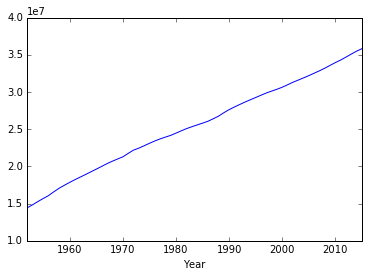

In [16]:
pop_data['Canada'].plot();

**Example.** Plot the populations of Ontario and Quebec from 1952 to 2015.

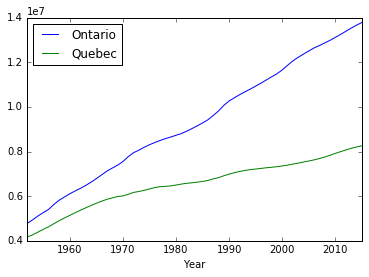

In [17]:
pop_data[['Ontario','Quebec']].plot()

**Example.** Plot the populations of Alberta, Saskatchewan and Manitoba from 1980 to 2000.

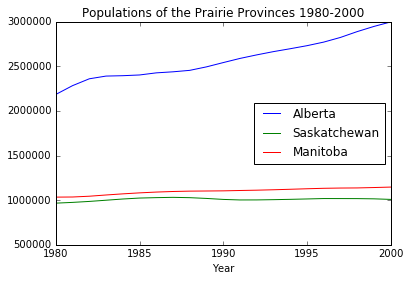

In [18]:
pop_data.loc[1980:2000,['Alberta','Saskatchewan','Manitoba']].plot(title='Populations of the Prairie Provinces 1980-2000')

**Example.** Plot the populations of the provinces in 2015 as a bar plot.

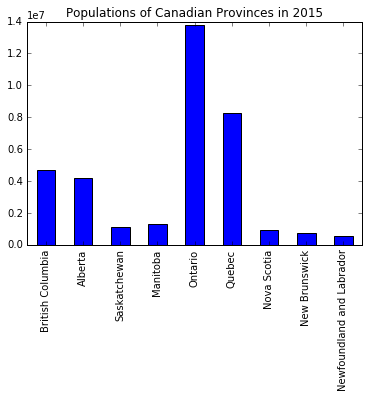

In [19]:
provinces = ['British Columbia','Alberta','Saskatchewan','Manitoba','Ontario',
             'Quebec','Nova Scotia','New Brunswick','Newfoundland and Labrador']
pop_data.loc[2015,provinces].plot(kind='bar',title='Populations of Canadian Provinces in 2015')

## 2. Exercises

**Exercise.** Plot the populations of Alberta and British Columbia from 1970 to 2010.

**Exercise.** Plot the populations of Nova Scotia, New Brunswick and Newfoundland and Labrador from 1952 to 2015.